# Importación de Cifras

In [66]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel('EXP-COL 2014-2017.xlsx')

In [3]:
df1.head()

,Minero DANE,País Destino,Departamento Origen,Posición,Mes,Valor FOB en USD
0,Mineras,Albania,Atlántico,2503000000,201407,17000.0
1,Mineras,Albania,Norte de Santander,2704001000,201701,946757.0
2,Mineras,Albania,Valle del Cauca,2507001000,201708,20000.0
3,Mineras,Albania,Valle del Cauca,2507001000,201711,30000.0
4,Mineras,Alemania,Antioquia,2505100000,201405,200.0


In [4]:
df1.shape

(839166, 6)

In [5]:
df2 = pd.read_excel('EXP-COL 2018-2020.xlsx')

In [6]:
df2.head()

,Minero DANE,País Destino,Departamento Origen,Posición,Mes,Valor FOB en USD
0,Mineras,Albania,Cundinamarca,2704001000,201908,1902830.30
1,Mineras,Albania,Norte de Santander,2704001000,201801,1644905.00
2,Mineras,Albania,Norte de Santander,2704001000,201803,1861200.00
3,Mineras,Albania,Norte de Santander,2704001000,201805,2904698.35
4,Mineras,Albania,Norte de Santander,2704001000,201810,2058573.00


In [7]:
df2.shape

(513865, 6)

In [8]:
df = pd.concat([df1,df2])

In [9]:
df.head()

,Minero DANE,País Destino,Departamento Origen,Posición,Mes,Valor FOB en USD
0,Mineras,Albania,Atlántico,2503000000,201407,17000.0
1,Mineras,Albania,Norte de Santander,2704001000,201701,946757.0
2,Mineras,Albania,Valle del Cauca,2507001000,201708,20000.0
3,Mineras,Albania,Valle del Cauca,2507001000,201711,30000.0
4,Mineras,Alemania,Antioquia,2505100000,201405,200.0


In [10]:
df.shape

(1353031, 6)

# Depuración de datos


In [11]:
df.columns=['Tipo','Pais','Departamento','PA','Mes','FOB']

In [12]:
df.head()

,Tipo,Pais,Departamento,PA,Mes,FOB
0,Mineras,Albania,Atlántico,2503000000,201407,17000.0
1,Mineras,Albania,Norte de Santander,2704001000,201701,946757.0
2,Mineras,Albania,Valle del Cauca,2507001000,201708,20000.0
3,Mineras,Albania,Valle del Cauca,2507001000,201711,30000.0
4,Mineras,Alemania,Antioquia,2505100000,201405,200.0


In [13]:
list(df['Tipo'].unique())

['Mineras', 'No Mineras']

In [14]:
list(df['Pais'].unique())

['Albania',
 'Alemania',
 'Andorra',
 'Angola',
 'Antigua y Barbuda',
 'Antillas Holandesas',
 'Arabia Saudita',
 'Argelia',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaiyán',
 'Bahamas',
 'Barbados',
 'Bélgica',
 'Belice',
 'Bolivia',
 'Bonaire, San Eustaquio y Saba',
 'Brasil',
 'Bulgaria',
 'Canadá',
 'Chile',
 'China',
 'Chipre',
 'Colombia',
 'Corea (Sur) Rep de',
 'Costa de Marfil',
 'Costa Rica',
 'Croacia',
 'Cuba',
 'Curazao',
 'Dinamarca',
 'Dominica',
 'Ecuador',
 'Egipto',
 'El Salvador',
 'Emiratos Árabes Unidos',
 'Eslovaquia',
 'Eslovenia',
 'España',
 'Estados Unidos',
 'Filipinas',
 'Finlandia',
 'Francia',
 'Gabón',
 'Georgia',
 'Ghana',
 'Gibraltar',
 'Granada',
 'Grecia',
 'Guadalupe',
 'Guatemala',
 'Guyana',
 'Haití',
 'Honduras',
 'Hong Kong',
 'Hungría',
 'India',
 'Indonesia',
 'Irak',
 'Irán Rep Islámica del',
 'Irlanda (Eire)',
 'Islas Caimán',
 'Islas Vírgenes (Estados Unido)',
 'Islas Vírgenes (Reino Unido)',
 'Israel',
 'Italia',


In [15]:
list(df['Departamento'].unique())

['Atlántico',
 'Norte de Santander',
 'Valle del Cauca',
 'Antioquia',
 'Bogotá',
 'Bolívar',
 'Boyacá',
 'Cesar',
 'Córdoba',
 'Desconocido',
 'Guainía',
 'La Guajira',
 'Santander',
 'Sucre',
 'Cundinamarca',
 'Arauca',
 'Casanare',
 'Huila',
 'Magdalena',
 'Meta',
 'Tolima',
 'Cauca',
 'Quindío',
 'Risaralda',
 'Guaviare',
 'Putumayo',
 'Caldas',
 'Vichada',
 'Caquetá',
 'Nariño',
 'Chocó',
 'San Andrés y Providencia',
 'Vaupés',
 'Amazonas']

In [16]:
list(df['PA'].unique())

[2503000000,
 2704001000,
 2507001000,
 2505100000,
 2506100000,
 2508400000,
 2515200000,
 2517100000,
 2517490000,
 2523210000,
 2523290000,
 2530900000,
 2601110000,
 2603000000,
 2710193800,
 2520100000,
 2523100000,
 2523900000,
 2618000000,
 2521000000,
 2621900000,
 2701120010,
 2701120090,
 2703000000,
 2710121300,
 2710121900,
 7106911000,
 7103101000,
 7103109000,
 7103912000,
 7103999000,
 7202600000,
 2709000000,
 7108120000,
 2704003000,
 2710129200,
 7110110000,
 2710193900,
 2710193300,
 2711130000,
 2516110000,
 2520200000,
 2707910000,
 2501001000,
 2710192200,
 2710193400,
 2504100000,
 2525200000,
 2710191200,
 2712903000,
 2712909000,
 2714900000,
 2710129900,
 2708200000,
 7106920000,
 2505900000,
 2515110000,
 2517410000,
 2522200000,
 2522100000,
 2710193500,
 2711120000,
 2516200000,
 2604000000,
 2710192100,
 2713110000,
 2501009900,
 2701110000,
 2706000000,
 2501009100,
 2513100000,
 2501002000,
 2515120000,
 2519902000,
 2702200000,
 2715009000,
 2712101000,

# Planteamiento del problema

Dada la coyuntura internacional actual, es de nuestro interés conocer el futuro comportamiento de los productos que a lo largo del 2019 y el último cuatrimestre han presentado un crecimiento en su dinámica de exportación. 

Después de realizar un análisis, los productos pertenecientes a las categorías de **Frutas frescas** e **Insecticidas** fueron los elegidos por para ser evaluados debido a que son los productos del sector No Minero que más crecen en los periodos propuestos inicialmente.

Ahora bien, a continuación se determinara el comportamiento futuro de forma general, a nivel de mercados claves (en los cuales estos participan) y los departamentos que más aportan en su exportación.

* Análisis general del producto X
* Análisis del producto en el departamento X
* Análisis del producto hacia el país X

# Filtrado de base

In [17]:
Insecticidas = ['3808500011','3808500019','3808590010','3808590020','3808911100','3808911200','3808911400','3808911900','3808919100','3808919200','3808919700','3808919990']

In [18]:
Frutas_frescas = ['0801119000','0801120000','0801190000','0801210000','0801220000','0801310000','0801320000','0802110000','0802129000','0802210000','0802320000','0802510000','0802520000','0802610000','0802620000','0802900000','0803101000','0803102000','0804100000','0804200000','0804300000','0804400000','0804501000','0804502000','0805100000','0805201000','0805202000','0805209000','0805210000','0805220000','0805291000','0805299000','0805400000','0805501000','0805502100','0805502200','0805900000','0806100000','0806200000','0807110000','0807190000','0807200000','0808100000','0808300000','0808400000','0809100000','0809290000','0809300000','0809400000','0810100000','0810200000','0810400000','0810500000','0810901010','0810901020','0810901030','0810901040','0810901090','0810902000','0810903000','0810904000','0810905000','0810909010','0810909020','0810909090']

In [19]:
df_i = df[df['PA'].isin(Insecticidas)].drop(columns=['Tipo','PA'])
df_i.head()

,Pais,Departamento,Mes,FOB
16029,Alemania,Atlántico,201510,10.0
16030,Alemania,Atlántico,201603,48.0
16031,Alemania,Atlántico,201605,40.0
16032,Alemania,Atlántico,201708,44.0
16033,Alemania,Atlántico,201408,160.0


In [20]:
df_i['Mes'] = df_i['Mes'].astype(str)

In [21]:
df_i['Year'] = df_i.Mes.str[:4]

In [22]:
df_i['Mes'] = df_i.Mes.str[:4]+'-'+df_i.Mes.str[-2:]
df_i.head()

,Pais,Departamento,Mes,FOB,Year
16029,Alemania,Atlántico,2015-10,10.0,2015
16030,Alemania,Atlántico,2016-03,48.0,2016
16031,Alemania,Atlántico,2016-05,40.0,2016
16032,Alemania,Atlántico,2017-08,44.0,2017
16033,Alemania,Atlántico,2014-08,160.0,2014


In [23]:
df_ff = df[df['PA'].isin(Frutas_frescas)].drop(columns=['Tipo','PA'])

In [24]:
df_ff['Mes'] = df_ff['Mes'].astype(str)
df_ff['Year'] = df_ff.Mes.str[:4]
df_ff['Mes'] = df_ff.Mes.str[:4]+'-'+df_ff.Mes.str[-2:]

print(df_ff.shape)
df_ff.head()

(28486, 5)


,Pais,Departamento,Mes,FOB,Year
14442,Alemania,Antioquia,2016-05,13490.40,2016
14443,Alemania,Antioquia,2015-01,19200.00,2015
14444,Alemania,Antioquia,2015-02,163200.00,2015
14445,Alemania,Antioquia,2015-03,28800.00,2015
14508,Alemania,Antioquia,2016-01,110225.09,2016


# Formato de fecha

## Insecticida

In [25]:
df_i['Mes'] = df_i['Mes'].astype(str)

In [26]:
df_i['Year'] = df_i.Mes.str[:4]

In [27]:
df_i['Mes'] = df_i.Mes.str[:4]+'-'+df_i.Mes.str[-2:]

In [28]:
df_i.head()

,Pais,Departamento,Mes,FOB,Year
16029,Alemania,Atlántico,2015-10,10.0,2015
16030,Alemania,Atlántico,2016-03,48.0,2016
16031,Alemania,Atlántico,2016-05,40.0,2016
16032,Alemania,Atlántico,2017-08,44.0,2017
16033,Alemania,Atlántico,2014-08,160.0,2014


In [29]:
df_i['Mes'] = pd.to_datetime(df_i['Mes'])

In [30]:
df_i.head()

,Pais,Departamento,Mes,FOB,Year
16029,Alemania,Atlántico,2015-10-01,10.0,2015
16030,Alemania,Atlántico,2016-03-01,48.0,2016
16031,Alemania,Atlántico,2016-05-01,40.0,2016
16032,Alemania,Atlántico,2017-08-01,44.0,2017
16033,Alemania,Atlántico,2014-08-01,160.0,2014


## Frutas frescas

In [31]:
df_ff['Mes'] = df_ff['Mes'].astype(str)

In [32]:
df_ff['Year'] = df_ff.Mes.str[:4]

In [33]:
df_ff['Mes'] = df_ff.Mes.str[:4]+'-'+df_ff.Mes.str[-2:]

In [34]:
df_ff.head()

,Pais,Departamento,Mes,FOB,Year
14442,Alemania,Antioquia,2016-05,13490.40,2016
14443,Alemania,Antioquia,2015-01,19200.00,2015
14444,Alemania,Antioquia,2015-02,163200.00,2015
14445,Alemania,Antioquia,2015-03,28800.00,2015
14508,Alemania,Antioquia,2016-01,110225.09,2016


In [35]:
df_ff['Mes'] = pd.to_datetime(df_ff['Mes'])

In [36]:
df_ff.head()

,Pais,Departamento,Mes,FOB,Year
14442,Alemania,Antioquia,2016-05-01,13490.40,2016
14443,Alemania,Antioquia,2015-01-01,19200.00,2015
14444,Alemania,Antioquia,2015-02-01,163200.00,2015
14445,Alemania,Antioquia,2015-03-01,28800.00,2015
14508,Alemania,Antioquia,2016-01-01,110225.09,2016


# Eleccion de paises

Se busco elegir los paises con más exportaciones en cada producto en un principio. Sinembargo, debido a que encontramos varios valores vacios en las series decidimos trabajar con las que no tenían vacios y además eran representativos


In [37]:
df_i_a = df_i.groupby(['Pais']).sum().reset_index().sort_values(by='FOB', ascending=False).head(5)
df_ff_a = df_ff.groupby(['Pais']).sum().reset_index().sort_values(by='FOB', ascending=False).head(5)

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

print(color.BOLD + 'Exportaciones de Insecticidas' + color.END)
display(df_i_a)
print(color.BOLD + 'Exportaciones de Frutas frescas' + color.END)
display(df_ff_a)

Exportaciones de Insecticidas


,Pais,FOB
5,Brasil,5.106490e+08
26,México,1.156063e+08
1,Argentina,1.101014e+08
12,Ecuador,5.264958e+07
31,Perú,5.013548e+07


Exportaciones de Frutas frescas


,Pais,FOB
53,Países Bajos,4.335130e+08
26,Estados Unidos,2.370975e+08
59,Reino Unido,1.985045e+08
10,Bélgica,7.561823e+07
25,España,7.317714e+07


In [38]:
df_i_Pa_Ec = df_i.drop(columns = ['Departamento','Year'], axis = 1).set_index('Mes')
df_i_Pa_Ec = df_i_Pa_Ec.pivot_table(values='FOB',index = 'Mes' ,columns=['Pais'])
df_i_Pa_Ec.isna().sum().sort_values(ascending=True)

Pais
Panamá                                  0
Ecuador                                 0
Perú                                    0
República Dominicana                    0
Guatemala                               0
Costa Rica                              1
Honduras                                2
El Salvador                             4
México                                  8
Argentina                              15
Zona Franca de Candelaria Cartagena    20
Nicaragua                              22
Chile                                  24
Brasil                                 35
Venezuela                              37
Belice                                 38
Bolivia                                45
Zona Franca de Barranquilla            51
Paraguay                               54
Trinidad y Tobago                      56
Alemania                               60
Jamaica                                63
Estados Unidos                         63
Uruguay                      

In [39]:
df_ff_Al_Hk = df_ff.drop(columns = ['Departamento','Year'], axis = 1).set_index('Mes')
df_ff_Al_Hk = df_ff_Al_Hk.pivot_table(values='FOB',index = 'Mes' ,columns=['Pais'])
df_ff_Al_Hk.isna().sum().sort_values(ascending=True)

Pais
Alemania       0
Hong Kong      0
Panamá         0
Guadalupe      0
Francia        0
              ..
Montenegro    75
Lituania      75
Jordania      75
Austria       75
Egipto        75
Length: 74, dtype: int64

In [40]:
df_i_cols_plot = ['Panamá', 'Ecuador']
df_i_Pa_Ec = df_i[df_i.Pais.isin(df_i_cols_plot)].drop(columns = ['Departamento','Year'], axis = 1).set_index('Mes')
df_i_Pa_Ec = df_i_Pa_Ec.pivot_table(values='FOB',index = 'Mes' ,columns=['Pais']).fillna(0)
df_i_Pa_Ec

Pais,Ecuador,Panamá
Mes,,
2014-01-01,67566.728333,5924.940000
2014-02-01,29570.667778,4977.401667
2014-03-01,69334.425556,14204.570000
2014-04-01,57938.934000,15318.027143
2014-05-01,58067.513333,14251.541429
...,...,...
2019-12-01,59332.065455,15163.194000
2020-01-01,231824.308333,13885.953333
2020-02-01,79804.151000,5871.450000


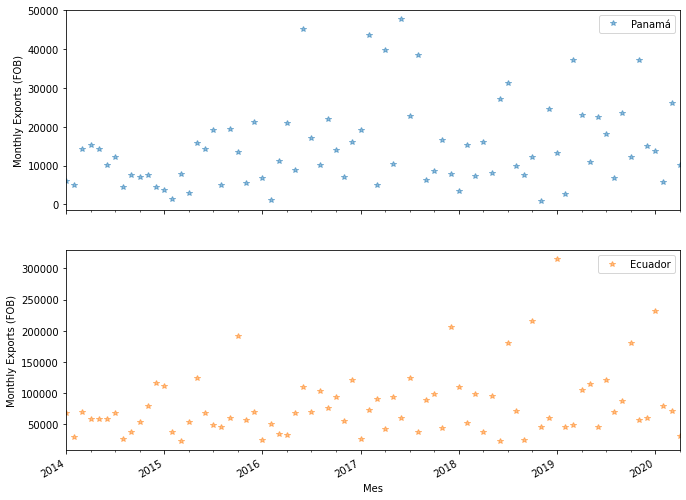

In [41]:
axes = df_i_Pa_Ec[df_i_cols_plot].plot(marker='*', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monthly Exports (FOB)')

In [42]:
df_ff_cols_plot = ['Alemania', 'Hong Kong']
df_ff_Al_Hk = df_ff[df_ff.Pais.isin(df_ff_cols_plot)].drop(columns = ['Departamento','Year'], axis = 1).set_index('Mes')
df_ff_Al_Hk = df_ff_Al_Hk.pivot_table(values='FOB',index = 'Mes' ,columns=['Pais']).fillna(0)
df_ff_Al_Hk

Pais,Alemania,Hong Kong
Mes,,
2014-01-01,29655.832500,3382.056000
2014-02-01,30801.018500,11438.650000
2014-03-01,38224.610870,27832.976667
2014-04-01,55361.476111,26133.076000
2014-05-01,76600.593478,7151.946667
...,...,...
2019-12-01,34079.517600,7410.360000
2020-01-01,30079.412143,3897.334000
2020-02-01,22984.085758,3240.714000


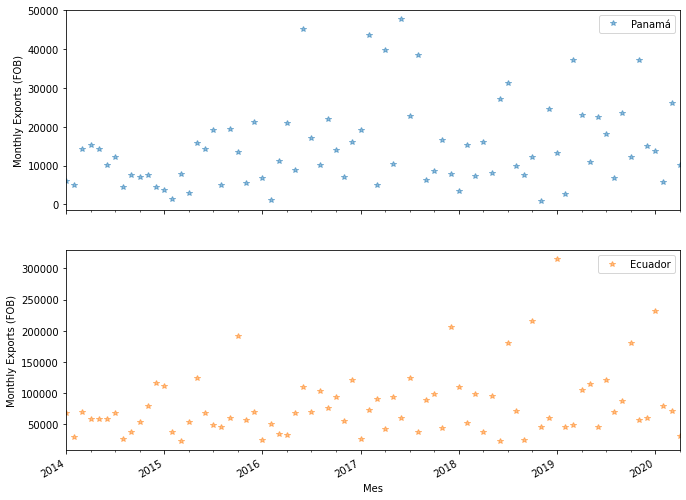

In [43]:
axes = df_i_Pa_Ec[df_i_cols_plot].plot(marker='*', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monthly Exports (FOB)')

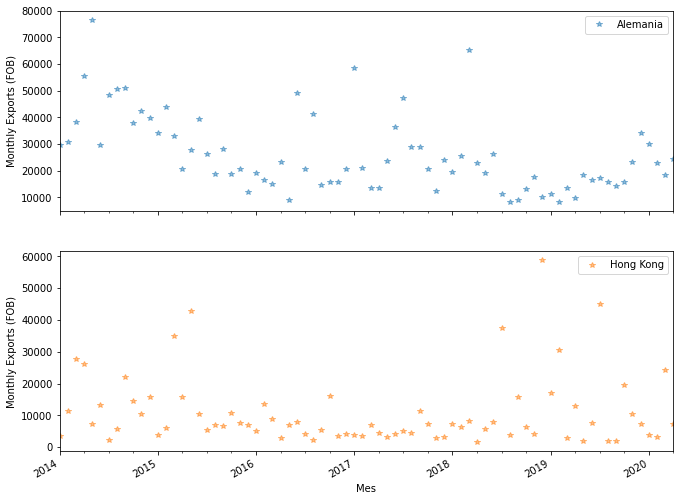

In [44]:
axes = df_ff_Al_Hk[df_ff_cols_plot].plot(marker='*', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Monthly Exports (FOB)')

## Análisis series de tiempo

In [45]:
%matplotlib inline

In [46]:
dff=df_ff_Al_Hk[df_ff_cols_plot]
dfi=df_i_Pa_Ec[df_i_cols_plot]

Text(0.5, 0, 'Month')

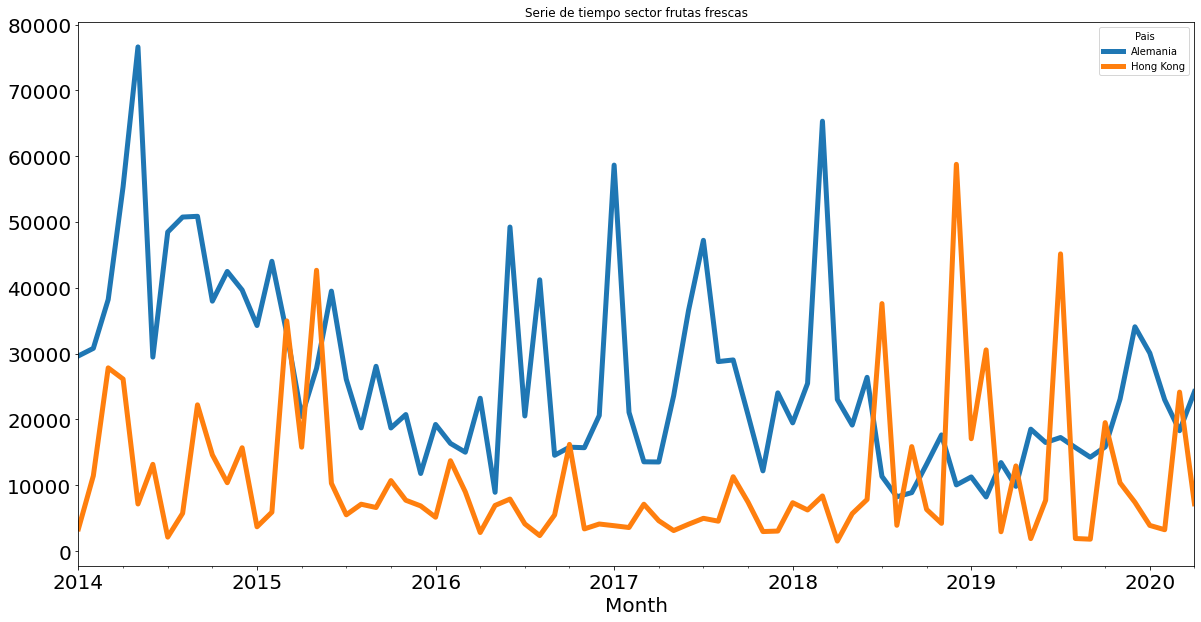

In [47]:
dff.plot(figsize=(20,10), linewidth=5, fontsize=20, title='Serie de tiempo sector frutas frescas')
plt.xlabel('Month', fontsize=20)

**País de Alemania:** En esta primera gráfica se observa que las exportaciones en el sector de frutas frescas tienen un comportamiento similar entre el año 2014 hasta finales del 2018, donde el valor FOB se mantiene dentro de un rango de 10 mil hasta incluso 60 mil y con una estacionalidad cada tres meses.
Sin embargo, a partir de mitad del 2018 las exportaciones se han manteido por debajo de los 20 mil con un outlayer a finales del 2019 y parece que están volviendo a subir en el año 2020.

**País de Hong Kong:** Se observa que el valor FOB de las exportaciones oscilan entre 5 mil y 20 mil desde el 2014 hasta el 2020, con algunos picos en el 2015 y entre el 2018 y el 2020

Text(0.5, 0, 'Month')

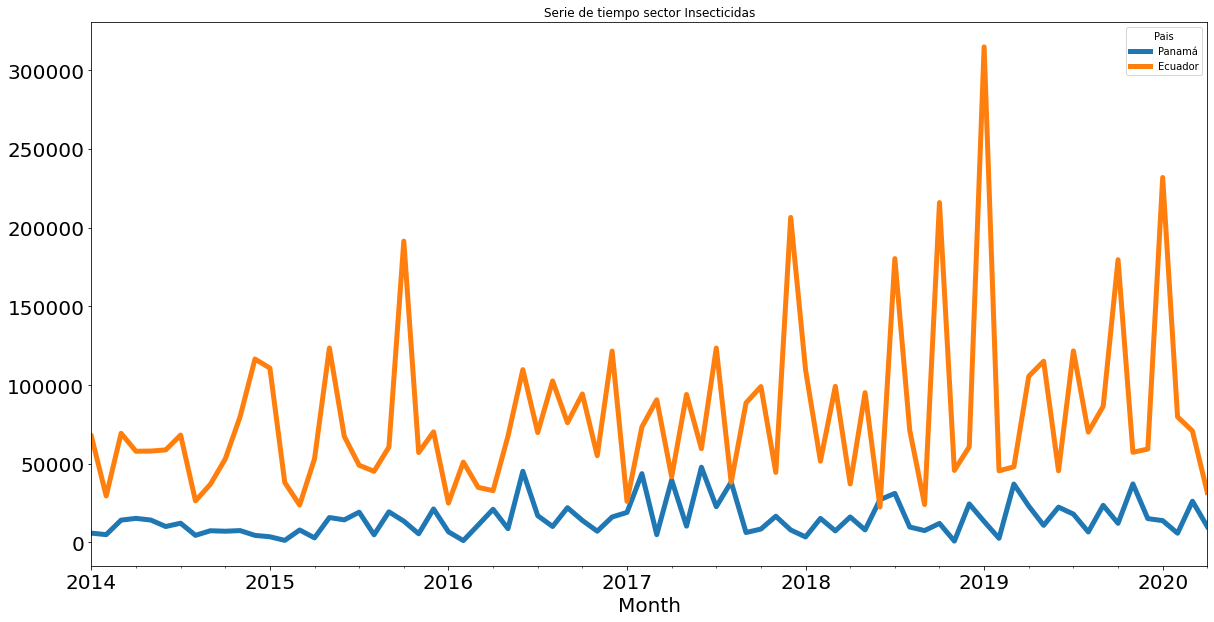

In [48]:
dfi.plot(figsize=(20,10), linewidth=5, fontsize=20, title='Serie de tiempo sector Insecticidas')
plt.xlabel('Month', fontsize=20)

**País de Panamá:** En esta primera gráfica se observa que las exportaciones en el sector de Insecticidas tienen un comportamiento fluctuante. En el cual, se observa que cada dos meses hay grandes picos de exportación que están entre los 150mil y los 300mil. Y en los meses intermedios se observan valles que estan alrededor de los 25mil

**País de Ecuador:** Se observa que el valor FOB de las exportaciones oscilan entre 0 y 50 mil desde el 2014 hasta el 2020, sin mayorescambios a los largo de los 6 años

# Modelos

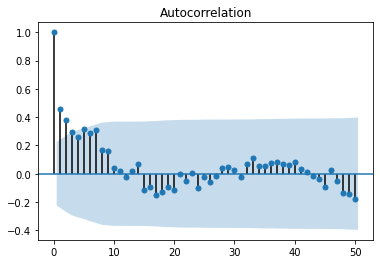

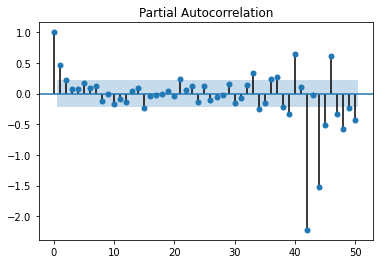

In [53]:
plot_acf(dff['Alemania'], lags=50);
plot_pacf(dff['Alemania'], lags=50);

In [57]:
d_ff = adfuller(dff['Alemania'])
print('ADF Statistic: %f' % d_ff[0])
print('p-value: %f' % d_ff[1])

ADF Statistic: -5.207507
p-value: 0.000008


In [59]:
d_ff = adfuller(dff['Alemania'].diff().iloc[1:])
print('ADF Statistic: %f' % d_ff[0])
print('p-value: %f' % d_ff[1])

ADF Statistic: -8.065884
p-value: 0.000000


# Arima

In [63]:
# fit model
model = ARIMA(dff['Alemania'], order=(2,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.Alemania   No. Observations:                   75
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -818.117
Method:                       css-mle   S.D. of innovations          13191.474
Date:                Mon, 22 Jun 2020   AIC                           1644.233
Time:                        10:36:12   BIC                           1653.503
Sample:                    02-01-2014   HQIC                          1647.934
                         - 04-01-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -121.4615    887.124     -0.137      0.891   -1860.192    1617.269
ar.L1.D.Alemania    -0.5176      0.112     -4.614      0.000      -0.737      -0.298
ar.L2.D.Alemania    -0.2121 

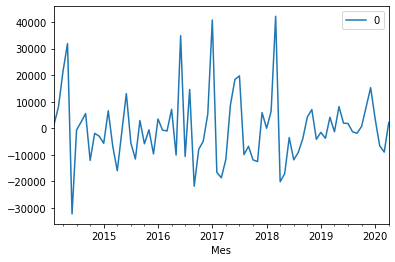

In [64]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

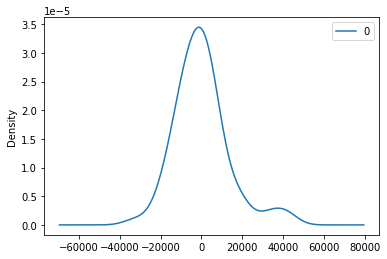

                  0
count     75.000000
mean      37.085088
std    13281.929060
min   -32294.630203
25%    -8490.150666
50%    -1340.259739
75%     5711.397809
max    42187.328090


In [65]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [68]:
X = dff['Alemania'].values
p=np.arange(1,12,1)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
errors = list()
for m in range(len(p)):
    for t in range(len(test)):
        model = ARIMA(history, order=(m,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions) ** 0.5
    print(m,error)
    errors.append(error)
    predictions = list()
    history = [x for x in train]

0 12848.621906578157
1 12420.513845165891
2 11820.917858085662
3 12360.098563884121
4 12718.394640291506
5 12535.843445595016
6 12563.370168576683
7 13120.364805281393
8 13215.816068849661
9 13155.147674617838
10 13331.172768163533


# prophet

# Serie log

In [72]:
dff_lg=dff
dff_lg['Alemania_log']=np.log(dff_lg['Alemania'])
dff_lg.head()

Pais,Alemania,Hong Kong,Alemania_log
Mes,,,
2014-01-01,29655.832500,3382.056000,10.297414
2014-02-01,30801.018500,11438.650000,10.335303
2014-03-01,38224.610870,27832.976667,10.551235
2014-04-01,55361.476111,26133.076000,10.921639
2014-05-01,76600.593478,7151.946667,11.246360


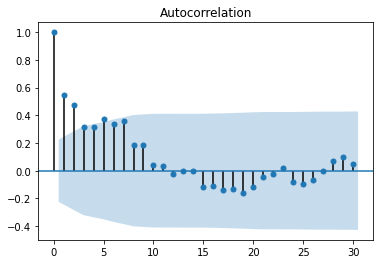

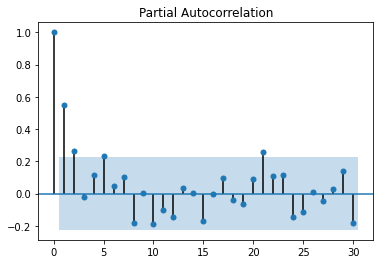

In [75]:
plot_acf(dff_lg['Alemania_log'], lags=30);
plot_pacf(dff_lg['Alemania_log'], lags=30);

In [77]:
d_ff_lg = adfuller(dff_lg['Alemania_log'])
print('ADF Statistic: %f' % d_ff_lg[0])
print('p-value: %f' % d_ff_lg[1])

ADF Statistic: -3.128120
p-value: 0.024541


In [78]:
d_ff_lg = adfuller(dff_lg['Alemania_log'].diff().iloc[1:])
print('ADF Statistic: %f' % d_ff_lg[0])
print('p-value: %f' % d_ff_lg[1])

ADF Statistic: -7.570338
p-value: 0.000000


In [85]:
# fit model
model_log = ARIMA(dff_lg['Alemania_log'], order=(2,1,0))
model_lg_fit = model_log.fit(disp=0)
print(model_lg_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.Alemania_log   No. Observations:                   75
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -46.785
Method:                       css-mle   S.D. of innovations              0.451
Date:                Mon, 22 Jun 2020   AIC                            101.570
Time:                        10:59:41   BIC                            110.840
Sample:                    02-01-2014   HQIC                           105.272
                         - 04-01-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0043      0.033     -0.129      0.898      -0.070       0.061
ar.L1.D.Alemania_log    -0.4663      0.114     -4.082      0.000      -0.690      -0.242
ar.L2.D.Alem

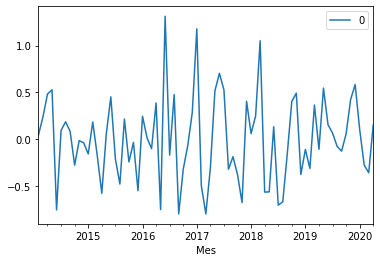

In [86]:
# plot residual errors
residuals_log = pd.DataFrame(model_lg_fit.resid)
residuals_log.plot()
plt.show()

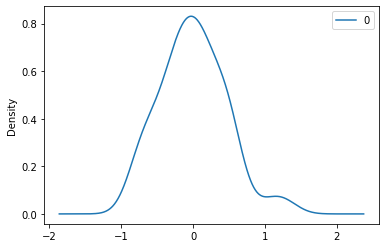

               0
count  75.000000
mean    0.000605
std     0.453913
min    -0.801412
25%    -0.311458
50%    -0.017028
75%     0.266277
max     1.314204


In [87]:
residuals_log.plot(kind='kde')
plt.show()
print(residuals_log.describe())

In [88]:
X = dff_lg['Alemania_log'].values
p=np.arange(1,12,1)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
errors = list()
for m in range(len(p)):
    for t in range(len(test)):
        model = ARIMA(history, order=(m,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions) ** 0.5
    print(m,error)
    errors.append(error)
    predictions = list()
    history = [x for x in train]

0 0.438084013302808
1 0.4397479630189478
2 0.43618277376485004
3 0.4559175527334102
4 0.47697862523901846
5 0.4784073546093865
6 0.484903901361864
7 0.49624809391591673
8 0.5043731300693771
9 0.5011683115852876
10 0.5062758548177956
